# About
This notebook evaluates if the overtime wins & losses shall be ommitted from the odd calculation or not.
***


# Preface
## Imports

In [1]:
import os
os.chdir("/home/jovyan/work")

from IPython.core.display import HTML
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from src.transformer import HistWinLossTransformer, OddTransformer, SeedTransformer, WinLossTransformer
from src.utils import get_table, sample_submission_to_df

## Config

In [2]:
%matplotlib inline
sns.set()
HTML("""
<style>
.output_png{
text-align:center;
}
</style>
""")

***
# Odds regular season

## Enrich data with wins/losses by ot

In [3]:
# get table
df_ncaa = get_table("t_original_ncaa_tourney_compact_results")[["season", "w_team_id", "l_team_id"]]

# define transformer
wltrans_ot = WinLossTransformer(
    "w_team_id",
    "l_team_id",
    split_by_ot=True,
)

# enhance data
df_ncaa_wl_by_ot = wltrans_ot.fit_transform(df_ncaa)

## Derive odds based on no overtime wins/losses

In [4]:
otrans_no_ot = OddTransformer(
    ["wins_no_ot_reg_a"],
    ["losses_no_ot_reg_a"],
    ["wins_no_ot_reg_b"],
    ["losses_no_ot_reg_b"],
    n_samples=100,
    n_experiments=100,
)

df_ncaa_odds_no_ot = otrans_no_ot.fit_transform(df_ncaa_wl_by_ot)

## Derive odds based on all wins/losses

In [5]:
otrans_all = OddTransformer(
    ["wins_no_ot_reg_a", "wins_ot_reg_a"],
    ["losses_no_ot_reg_a", "losses_ot_reg_a"],
    ["wins_no_ot_reg_b", "wins_ot_reg_b"],
    ["losses_no_ot_reg_b", "losses_ot_reg_b"],
    n_samples=100,
    n_experiments=100,
)

df_ncaa_odds_all = otrans_all.fit_transform(df_ncaa_wl_by_ot)

## Plot odds based on all / no ot wins/losses

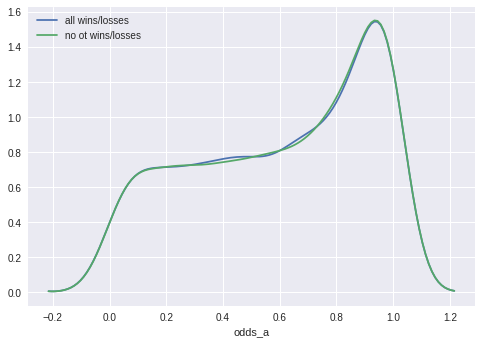

In [6]:
sns.distplot(df_ncaa_odds_all["odds_a"], hist=False, label="all wins/losses")
sns.distplot(df_ncaa_odds_no_ot["odds_a"], hist=False, label="no ot wins/losses")
plt.legend(loc="best")
plt.savefig("./figures/05_jgoerner_odds_overtime_ot_no_ot_comparison.png")

***
# Odds historic NCAA

In [7]:
# get table
df_ncaa = get_table("t_original_ncaa_tourney_compact_results")[["season", "w_team_id", "l_team_id"]]

# define transformer
hwltrans_ot = HistWinLossTransformer(
    "w_team_id",
    "l_team_id",
    split_by_ot=True,
)

# enhance data
df_ncaa_hist_wl_by_ot = hwltrans_ot.fit_transform(df_ncaa)

## Derive odds based on no overtime wins/losses

In [9]:
otrans_hist_no_ot = OddTransformer(
    ["wins_no_ot_hist_a"],
    ["losses_no_ot_hist_a"],
    ["wins_no_ot_hist_b"],
    ["losses_no_ot_hist_b"],
    n_samples=100,
    n_experiments=100,
)

df_ncaa_hist_odds_no_ot = otrans_hist_no_ot.fit_transform(df_ncaa_hist_wl_by_ot)

## Derive odds based on all wins/losses

In [13]:
otrans_hist_all = OddTransformer(
    ["wins_no_ot_hist_a", "wins_ot_hist_a"],
    ["losses_no_ot_hist_a", "losses_ot_hist_a"],
    ["wins_no_ot_hist_b", "wins_ot_hist_b"],
    ["losses_no_ot_hist_b", "losses_ot_hist_b"],
    n_samples=100,
    n_experiments=100,
)

df_ncaa_hist_odds_all = otrans_hist_all.fit_transform(df_ncaa_hist_wl_by_ot)

# Plot odds based on all / no ot wins/losses

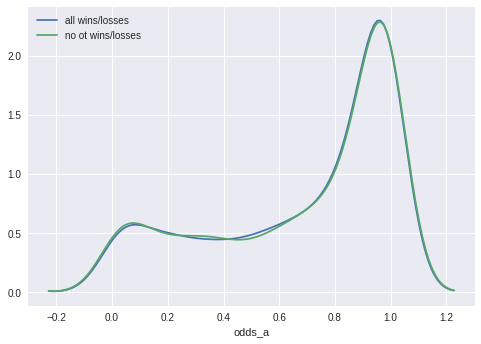

In [16]:
sns.distplot(df_ncaa_hist_odds_all["odds_a"], hist=False, label="all wins/losses")
sns.distplot(df_ncaa_hist_odds_no_ot["odds_a"], hist=False, label="no ot wins/losses")
plt.legend(loc="best")
plt.savefig("./figures/05_jgoerner_odds_overtime_hist_ot_no_ot_comparison.png")